In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from IPython import display
import gc
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28

In [2]:
dotNorm = 10.0  # For dot-size scaling
comovbox = 5.0 
z = 10.0
i = 70702
sbox = comovbox / (1.0 + z) * 0.71 # Create a box that's sbox kpc physical
gc.collect()

0

In [3]:
x,y,zz = np.loadtxt("z%05.2f_SpCoord_%d.txt"%(z,i))
locs = np.loadtxt("spLocHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1) - np.array([x,y,zz]) # Normalize
mass = np.loadtxt("spMassHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1)
Z    = np.loadtxt("spZHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PZ   = np.loadtxt("spPZHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PPF  = np.loadtxt("spPPFHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1) # SOLAR units in the file... 

In [4]:
print(len(Z[Z<3.0e-10])) # = 1.0e-10
#pzf[pzf<1.0e-5] = 1.0e-10

rng1 = (Z < 1.e-5)
rng2 = ((Z >= 1.e-5) & (Z < 1.e-3))
rng3 = ((Z >= 1.e-3) & (Z < 1.e-1))
rng4 = (Z >= 1.e-1)
print(Z[rng4])
print(locs[rng4])

32
[]
[]


In [5]:
z1=np.log10(Z[rng1])
z2=np.log10(Z[rng2])
z3=np.log10(Z[rng3])
z4=np.log10(Z[rng4])

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [6]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(-7.5,0,16)
ticks  =[-7,-6,-5,-4,-3,-2,-1,0]
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [45]:
legStr = '{:.0f}'.format(size)
legStr = legStr + " $M_{\odot}$"
print(legStr)

726 $M_{\odot}$


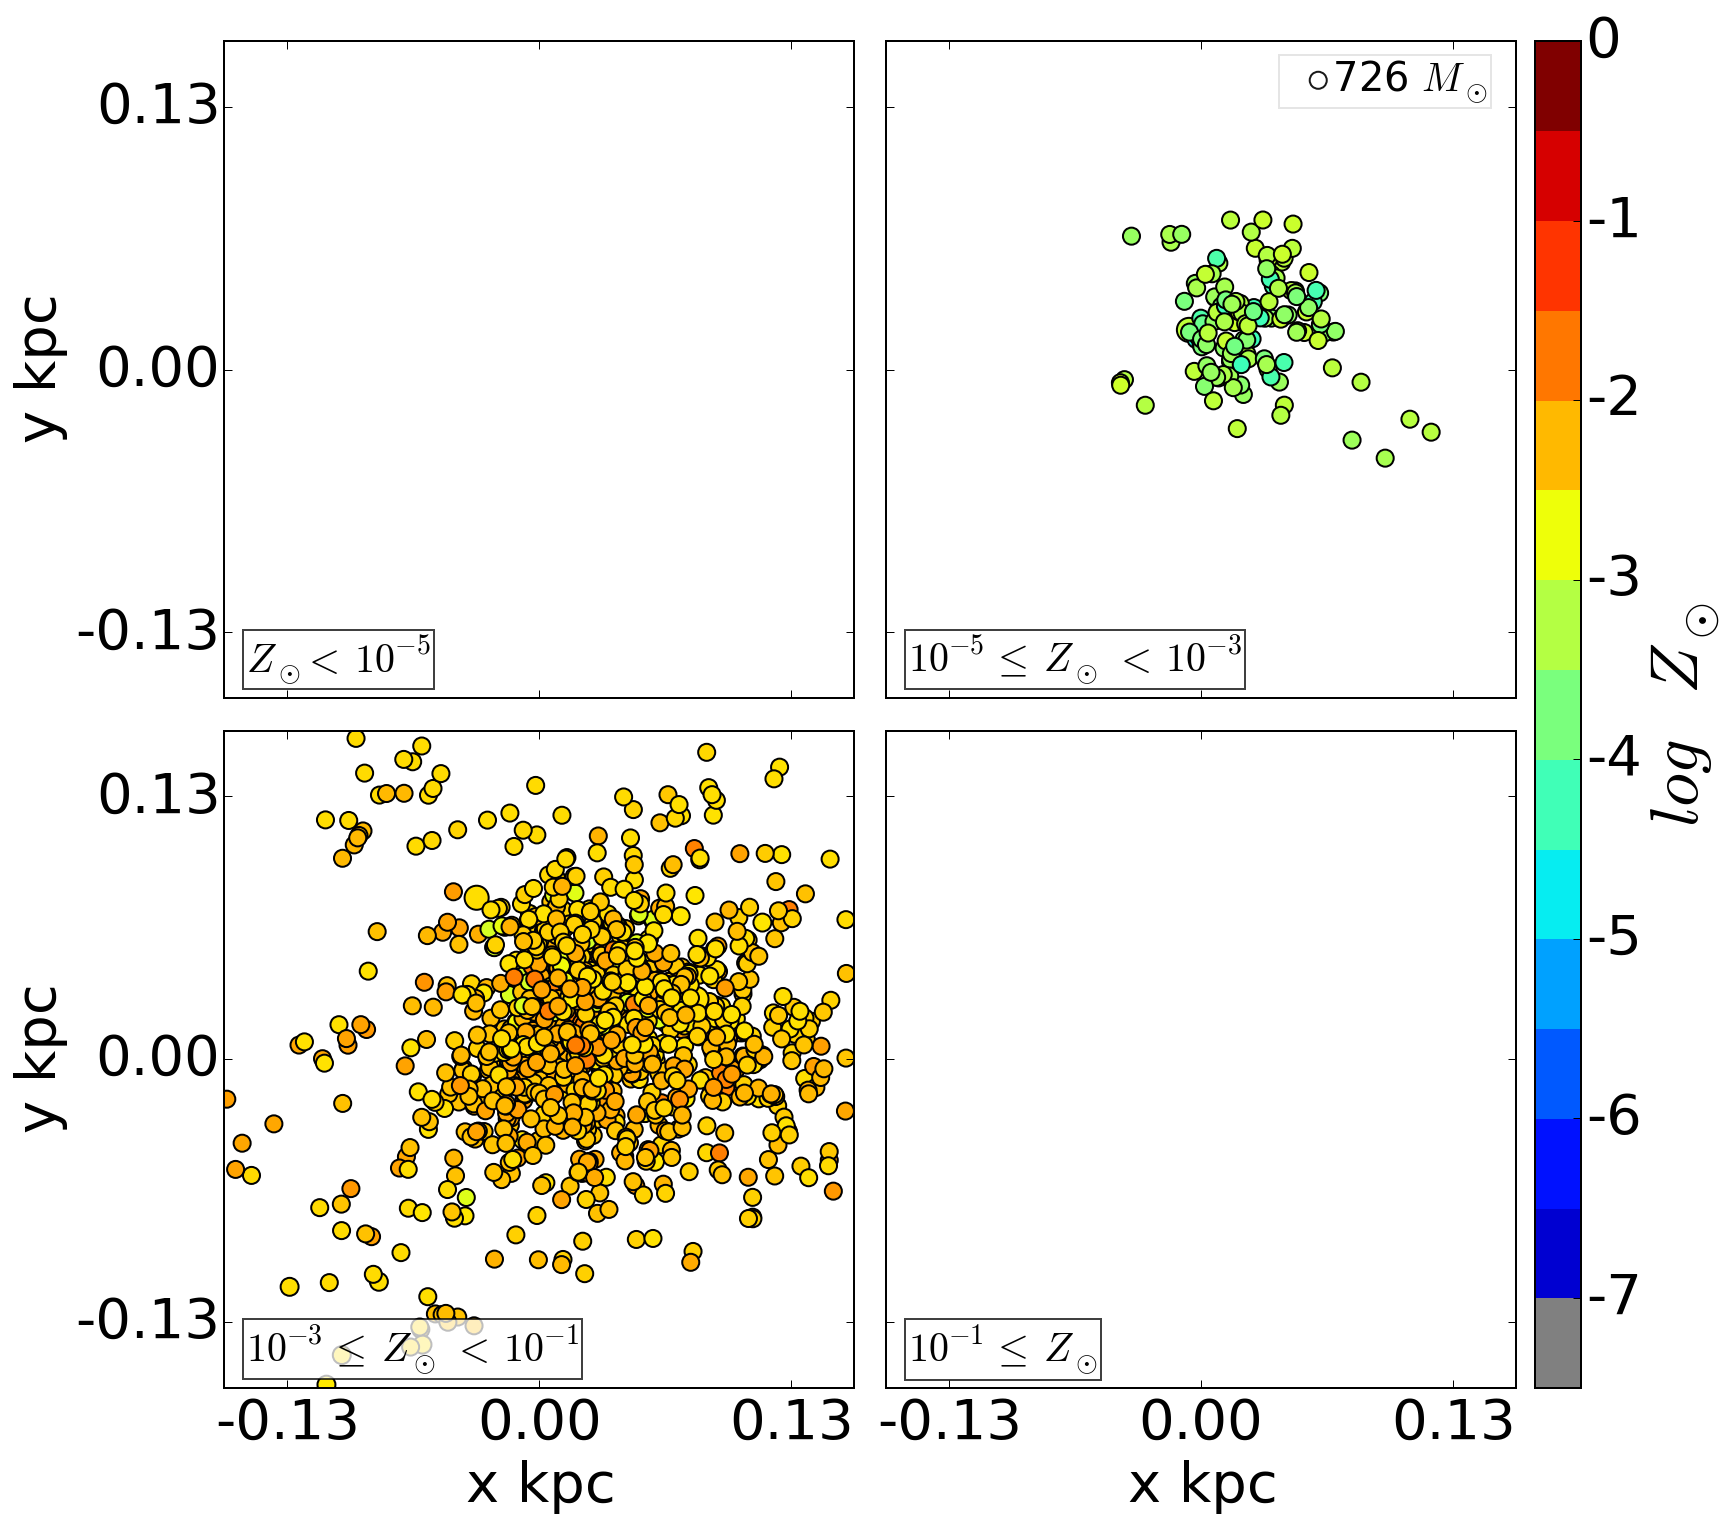

In [64]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
p1 = ax1.scatter(xcoord[rng1], ycoord[rng1], s=mass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rng2], ycoord[rng2], s=mass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rng3], ycoord[rng3], s=mass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rng4], ycoord[rng4], s=mass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\odot} <\, 10^{-5}$',bbox=bbox, fontsize=20)
ax2.text(xpos,ypos,'$10^{-5} \leq\, Z_{\odot}\, <\, 10^{-3}$',bbox=bbox,fontsize=20)
ax3.text(xpos,ypos,'$10^{-3} \leq\, Z_{\odot}\, <\, 10^{-1}$',bbox=bbox,fontsize=20)
ax4.text(xpos,ypos,'$10^{-1} \leq\, Z_{\odot}$',bbox=bbox,fontsize=20)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter('%.2f')
ax1.yaxis.set_ticks([starty+dy, 0,endy-dy]); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks([starty+dy, 0,endy-dy]); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks([startx+dx, 0,endx-dx]); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks([startx+dx, 0,endx-dx]); ax4.xaxis.set_major_formatter(formatter)

ax3.set_xlabel('x kpc')
ax4.set_xlabel('x kpc')
ax1.set_ylabel('y kpc')
ax3.set_ylabel('y kpc')

xpos = ax2.get_xlim()[1] - 0.15 * ax2.get_xlim()[1]
ypos = ax2.get_ylim()[1] - 0.15 * ax2.get_ylim()[1]
size = min(mass)
legStr = '    {:.0f}'.format(size)
legStr = legStr + " $M_{\odot}$"
bbox = {'facecolor':'white', 'alpha':0.1, 'pad':3}
ax2.annotate(legStr,xy=(xpos,ypos), xytext=(xpos+0.01, ypos), 
             horizontalalignment='right', bbox=bbox, size=20)
ax2.scatter(xpos-0.077, ypos+0.005, s=min(mass)/dotNorm,facecolors='none')

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('$log\; Z_{\odot}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.05, hspace=.05)
plt.show()
#plt.savefig("SP_Z_locs_z=%04.1lf-%d.pdf"%(z,i))

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


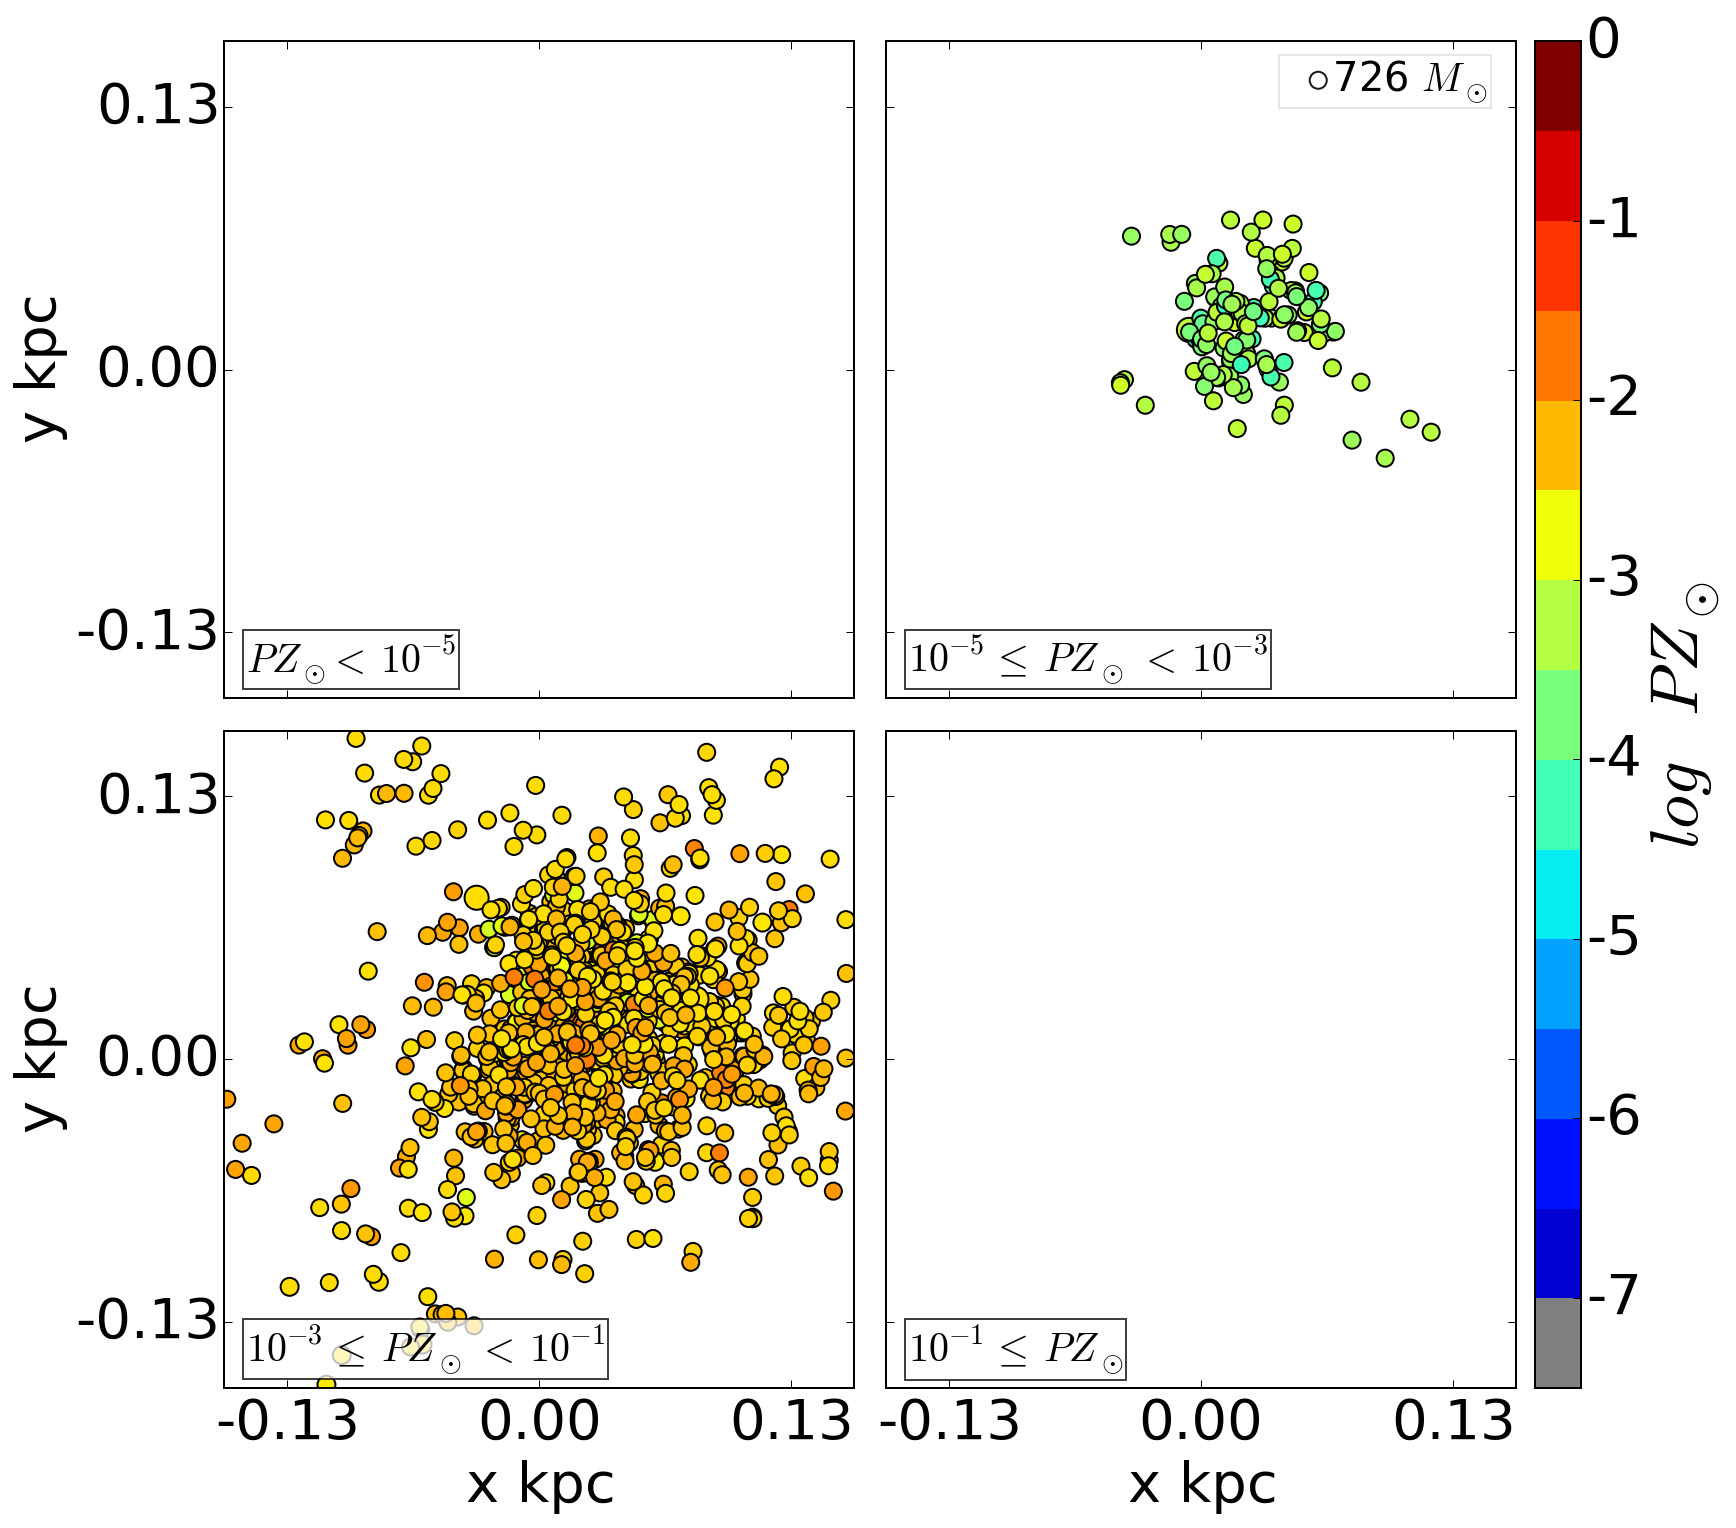

In [63]:
rng1 = (PZ < 1.e-5)
rng2 = ((PZ >= 1.e-5) & (PZ < 1.e-3))
rng3 = ((PZ >= 1.e-3) & (PZ < 1.e-1))
rng4 = (PZ >= 1.e-1)
z1=np.log10(PZ[rng1])
z2=np.log10(PZ[rng2])
z3=np.log10(PZ[rng3])
z4=np.log10(PZ[rng4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rng1], ycoord[rng1], s=mass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rng2], ycoord[rng2], s=mass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rng3], ycoord[rng3], s=mass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rng4], ycoord[rng4], s=mass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$PZ_{\odot} <\, 10^{-5}$',bbox=bbox, fontsize=20)
ax2.text(xpos,ypos,'$10^{-5} \leq\, PZ_{\odot}\, <\, 10^{-3}$',bbox=bbox,fontsize=20)
ax3.text(xpos,ypos,'$10^{-3} \leq\, PZ_{\odot}\, <\, 10^{-1}$',bbox=bbox,fontsize=20)
ax4.text(xpos,ypos,'$10^{-1} \leq\, PZ_{\odot}$',bbox=bbox,fontsize=20)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter('%.2f')
ax1.yaxis.set_ticks([starty+dy, 0,endy-dy]); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks([starty+dy, 0,endy-dy]); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks([startx+dx, 0,endx-dx]); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks([startx+dx, 0,endx-dx]); ax4.xaxis.set_major_formatter(formatter)

ax3.set_xlabel('x kpc')
ax4.set_xlabel('x kpc')
ax1.set_ylabel('y kpc')
ax3.set_ylabel('y kpc')

xpos = ax2.get_xlim()[1] - 0.15 * ax2.get_xlim()[1]
ypos = ax2.get_ylim()[1] - 0.15 * ax2.get_ylim()[1]
size = min(mass)
legStr = '    {:.0f}'.format(size)
legStr = legStr + " $M_{\odot}$"
bbox = {'facecolor':'white', 'alpha':0.1, 'pad':3}
ax2.annotate(legStr,xy=(xpos,ypos), xytext=(xpos+0.01, ypos), 
             horizontalalignment='right', bbox=bbox, size=20)
ax2.scatter(xpos-0.077, ypos+0.005, s=min(mass)/dotNorm, facecolors='none')

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('$log\; PZ_{\odot}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.05, hspace=.05)
plt.show()
#plt.savefig("SP_PZ_locs_z=%04.1lf-%d.pdf"%(z,i))

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


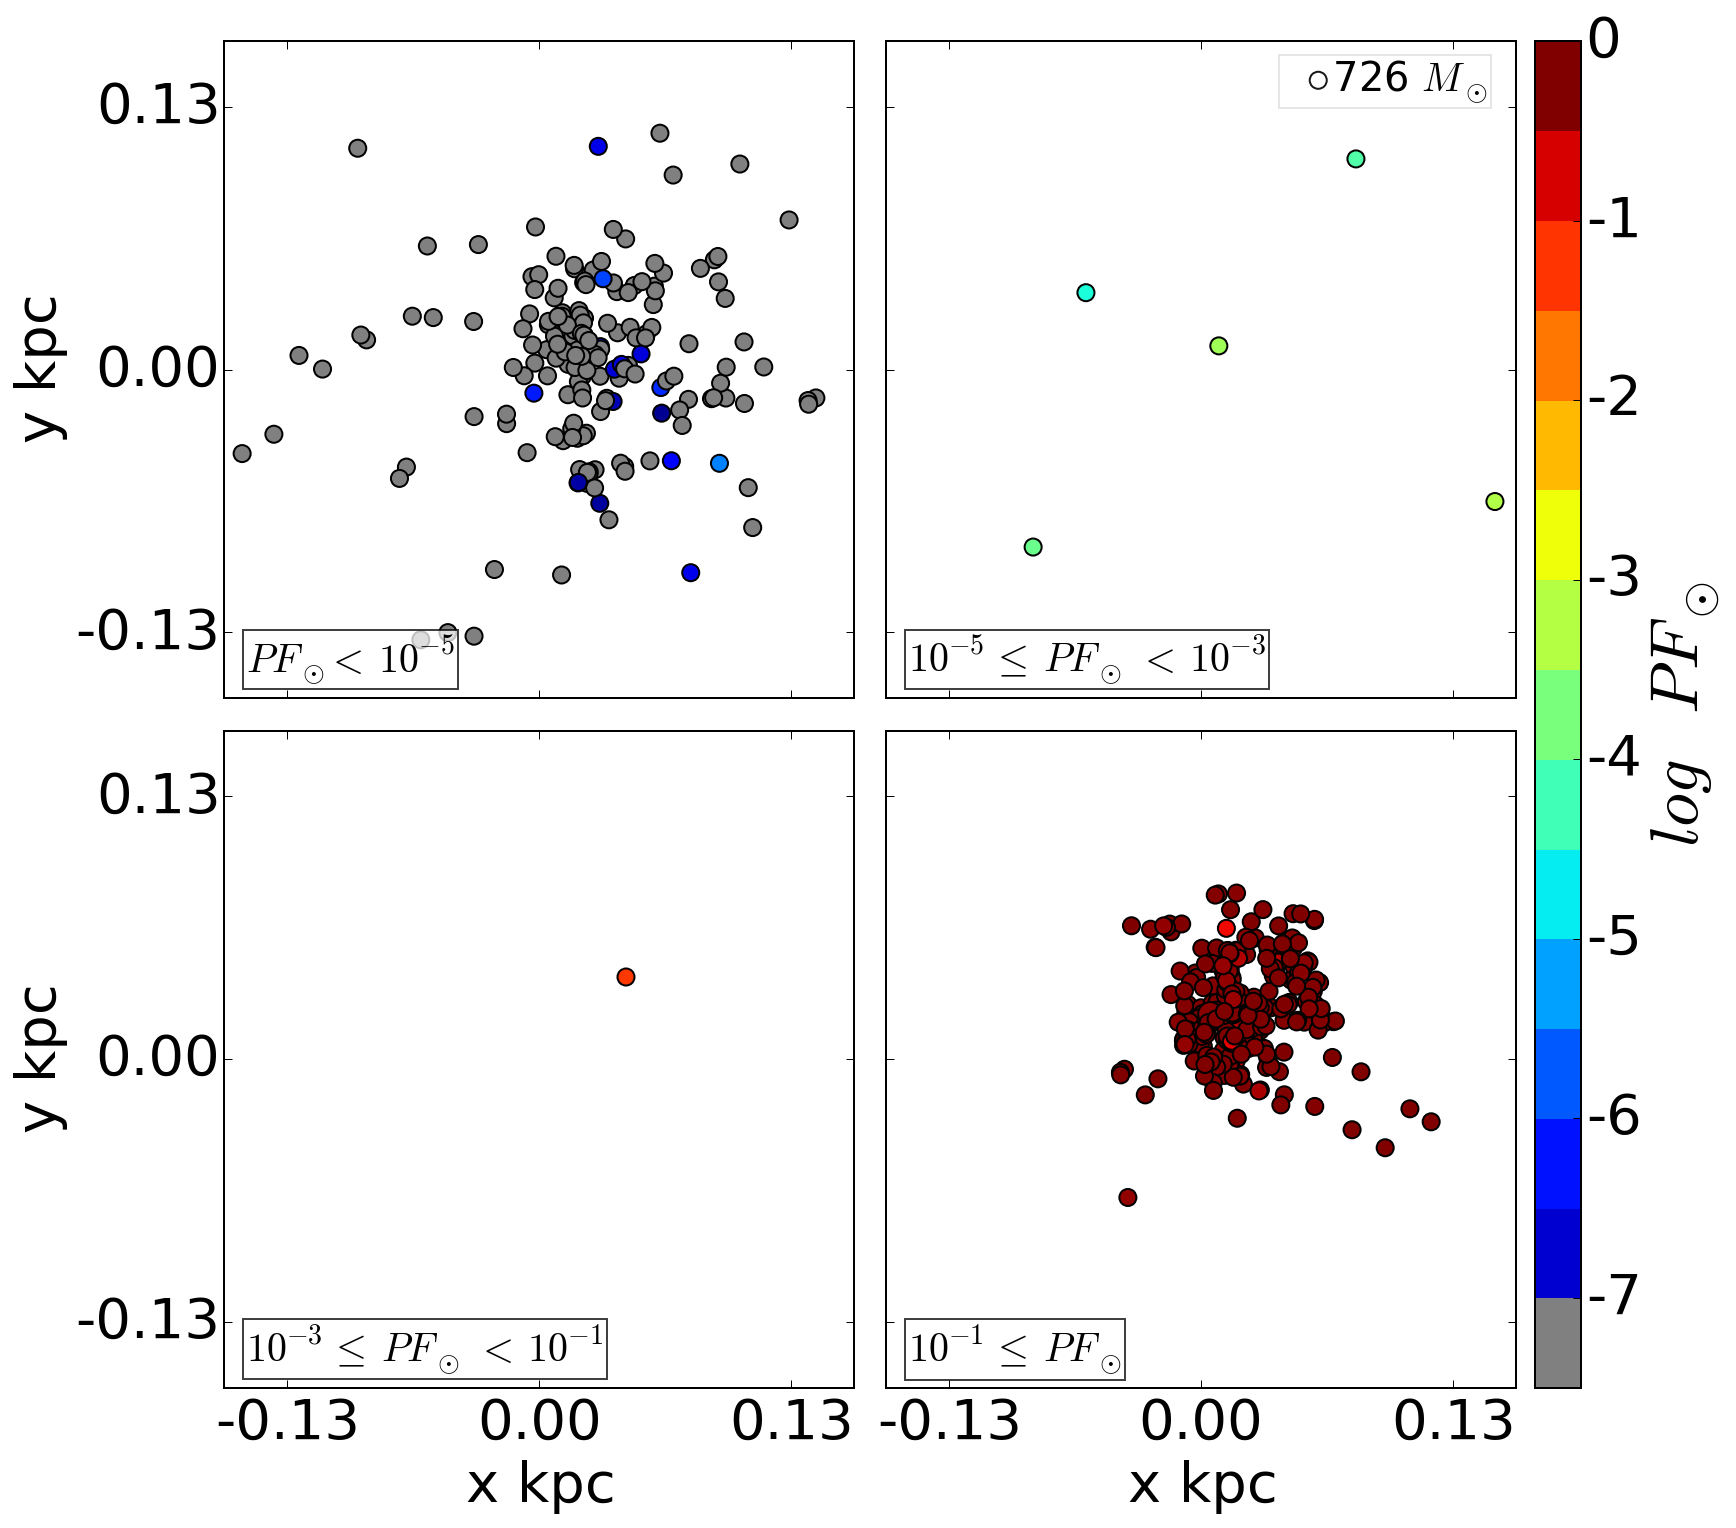

In [62]:
rng1 = (PPF < 1.e-5)
rng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
rng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
rng4 = (PPF >= 1.e-1)
z1=np.log10(PPF[rng1])
z2=np.log10(PPF[rng2])
z3=np.log10(PPF[rng3])
z4=np.log10(PPF[rng4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rng1], ycoord[rng1], s=mass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rng2], ycoord[rng2], s=mass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rng3], ycoord[rng3], s=mass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rng4], ycoord[rng4], s=mass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$PF_{\odot} <\, 10^{-5}$',bbox=bbox, fontsize=20)
ax2.text(xpos,ypos,'$10^{-5} \leq\, PF_{\odot}\, <\, 10^{-3}$',bbox=bbox,fontsize=20)
ax3.text(xpos,ypos,'$10^{-3} \leq\, PF_{\odot}\, <\, 10^{-1}$',bbox=bbox,fontsize=20)
ax4.text(xpos,ypos,'$10^{-1} \leq\, PF_{\odot}$',bbox=bbox,fontsize=20)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter('%.2f')
ax1.yaxis.set_ticks([starty+dy, 0,endy-dy]); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks([starty+dy, 0,endy-dy]); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks([startx+dx, 0,endx-dx]); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks([startx+dx, 0,endx-dx]); ax4.xaxis.set_major_formatter(formatter)

ax3.set_xlabel('x kpc')
ax4.set_xlabel('x kpc')
ax1.set_ylabel('y kpc')
ax3.set_ylabel('y kpc')

xpos = ax2.get_xlim()[1] - 0.15 * ax2.get_xlim()[1]
ypos = ax2.get_ylim()[1] - 0.15 * ax2.get_ylim()[1]
size = min(mass)
legStr = '    {:.0f}'.format(size)
legStr = legStr + " $M_{\odot}$"
bbox = {'facecolor':'white', 'alpha':0.1, 'pad':3}
ax2.annotate(legStr,xy=(xpos,ypos), xytext=(xpos+0.01, ypos), 
             horizontalalignment='right', bbox=bbox, size=20)
ax2.scatter(xpos-0.077, ypos+0.005, s=min(mass)/dotNorm, facecolors='none')

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('$log\; PF_{\odot}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.05, hspace=.05)
plt.show()
#plt.savefig("SP_PF_locs_z=%04.1lf-%d.pdf"%(z,i))

In [67]:
gc.collect()

0